<a href="https://colab.research.google.com/github/zpalevani/Captstone1/blob/main/%5BVersion_Six%5D_Capstone_1_Energy_Efficiency_(Feb2025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Objective**

The goal of this project is to analyze the energy efficiency of buildings and figure out which design features affect heating and cooling energy use the most. By calculating the Energy Efficiency Ratio (EER) and looking at how different features like Wall_Area, Roof_Area, and Relative_Compactness impact energy loads, I aim to uncover insights that can help improve building designs to be more energy-efficient.


**Business Questions**

1. Which building features have the biggest impact on heating and cooling energy demand?
 *  For example, does Wall_Area or Roof_Area make a bigger difference?

2. How does building compactness (Relative_Compactness) affect energy efficiency?
 *  Can compact buildings be more efficient in terms of energy use?

3. How can the Energy Efficiency Ratio (EER) help compare and rank buildings?
 *  Which buildings are the most efficient, and what features make them that way?

*  Data Source: [Link](https://archive.ics.uci.edu/dataset/242/energy+efficiency)

*  Citation: Tsanas, A. & Xifara, A. (2012). Energy Efficiency [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.

*  Additional Reading: [How AI is making buildings more energy efficient](https://time.com/7201501/ai-buildings-energy-efficiency/)

## **Environment Preparation**

In [ ]:
# Load the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset

url = "/content/ENB2012_data.xlsx"
data = pd.read_excel(url)

## **Initial Data Exploration**

In [ ]:
# Explore the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [ ]:
# Rename columns for simplicity
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Distribution',
                'Heating_Load', 'Cooling_Load']


In [ ]:
# Repeated with new column names: Explore the dataset
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Distribution  Heating_Load  Cooling_Load  
0            2           0.0                     0         15.55         21.33  
1            3           0.0                     0         15.55         21.33  
2            4           0.0                     0         15.55         21.33  
3            5           0.0                     0         15.55         21.33  
4            2           0.0                     0         20.84         28.28  


*Before furtehr progress in the analysis I'd like to familiarize myself with the data features.*

**Key Features of the Building Dataset**

**Wall Area:**

*  The total surface area of all the walls in the building.


**Roof Area:**

*  The surface area of the roof (top of the building).

**Surface Area:**

*  This is the total outer area of the building (walls + roof + base).

**Overall Height:**

*  The vertical height of the building from the ground to the top.

**Relative Compactness:**

*  Describes how compact the shape of the building is.
Compact buildings use less energy because they lose less heat compared to irregularly shaped ones.

**Glazing Area:**

*  The total surface area of windows (glass) in the building.

**Glazing Distribution:**

*  Indicates how the windows (glass areas) are spread around the building (e.g., evenly distributed or concentrated on one side).

**Orientation:**

*  Refers to the direction the building faces (e.g., north, south, etc.).
This can affect sunlight exposure and energy efficiency.

With above on mind, I looked at the above table again.

**Dataset Preview**

The first five rows of the dataset show the structure:

*  Key features include Relative_Compactness, Wall_Area, Roof_Area, and Overall_Height.
*  The target variables are Heating_Load and Cooling_Load, representing energy consumption for heating and cooling.

Example:

*  Row 0 has a Relative_Compactness of 0.98 and a Heating_Load of 15.55, with corresponding values for other features.

## **Data Cleaning and Preparation**

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Relative_Compactness    0
Surface_Area            0
Wall_Area               0
Roof_Area               0
Overall_Height          0
Orientation             0
Glazing_Area            0
Glazing_Distribution    0
Heating_Load            0
Cooling_Load            0
dtype: int64


No missing values exist in the dataset.

In [ ]:
# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Drop duplicate rows
data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


No duplicates exist in the dataset.

In [ ]:
# Check data types
print("Data types of each column:")
print(data.dtypes)

# Convert columns to numeric if needed
# Example: data['Wall_Area'] = pd.to_numeric(data['Wall_Area'], errors='coerce')


Data types of each column:
Relative_Compactness    float64
Surface_Area            float64
Wall_Area               float64
Roof_Area               float64
Overall_Height          float64
Orientation               int64
Glazing_Area            float64
Glazing_Distribution      int64
Heating_Load            float64
Cooling_Load            float64
dtype: object


All columns have the right data type.
*  float for numerical columns such as heating_load, cooling_load and wall_area
*  int for categorial columns such as orientation and glazing_distribution

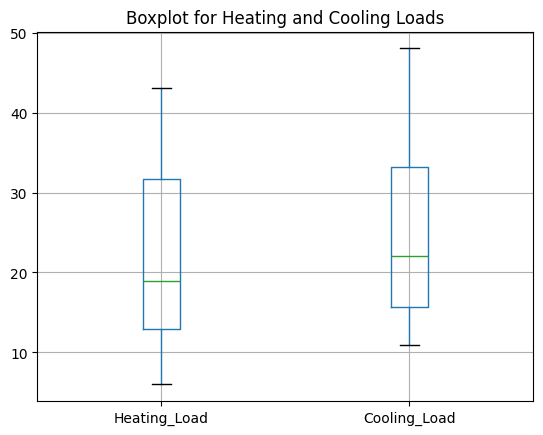

In [ ]:
# Identify outliers using boxplot
import matplotlib.pyplot as plt

data[['Heating_Load', 'Cooling_Load']].boxplot()
plt.title("Boxplot for Heating and Cooling Loads")
plt.show()


The boxplot above shows potential outliers
*   both loads show extreme values near their max, especially for higher energy demand
*   these might represent buildings with very specific designs or inefficiencies

The boxplot might only visually suggest that some data points are farther from the majority of the data, appearing to be outliers.

However, this can also be a visual impression and not confirmed through statistical methods. To decide whetehr to keep or remove the outlier, I firt need to confirm the status of the outlier. For this purpose, I choose the IQR calculation.

While I am going to use the IQR method, I have the following options on mind:

**Possible Strategies to Handle the Outliers**

*   **Remove Outliers:**
Using this option if outliers are errors or not representative of the population (e.g., extreme energy loads due to faulty design). After removing, data_no_outliers will be in the cleaned dataset.

*   **Cap Outliers:**
Using this if the outliers are valid but extreme values could skew results. Replacing them with the nearest bound (e.g., 5th/95th percentile) makes the data more stable.

*   **Keep Outliers:**
If outliers represent meaningful cases (e.g., unique building designs causing extreme energy usage), I can keep them for deeper analysis.

My goal is to leverage the IQR method to decide what to eventually do with the outlier data.

In [ ]:
# Load the re-uploaded dataset
file_path = '/content/ENB2012_data.xlsx'
data = pd.read_excel(file_path)

# Rename columns to match previous usage
data.columns = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area',
                'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Distribution',
                'Heating_Load', 'Cooling_Load']

# Step 1: Detect Outliers using IQR for Heating_Load and Cooling_Load
Q1 = data[['Heating_Load', 'Cooling_Load']].quantile(0.25)
Q3 = data[['Heating_Load', 'Cooling_Load']].quantile(0.75)
IQR = Q3 - Q1


# Calculate bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data[['Heating_Load', 'Cooling_Load']] < lower_bound) |
            (data[['Heating_Load', 'Cooling_Load']] > upper_bound))

# Count the outliers
outlier_counts = outliers.sum()

# Step 2: Remove Outliers
data_no_outliers = data[
    (data['Heating_Load'] >= lower_bound['Heating_Load']) &
    (data['Heating_Load'] <= upper_bound['Heating_Load']) &
    (data['Cooling_Load'] >= lower_bound['Cooling_Load']) &
    (data['Cooling_Load'] <= upper_bound['Cooling_Load'])
]

# Step 3: Cap Outliers
data_capped = data.copy()
data_capped['Heating_Load'] = data_capped['Heating_Load'].clip(lower=lower_bound['Heating_Load'],
                                                               upper=upper_bound['Heating_Load'])
data_capped['Cooling_Load'] = data_capped['Cooling_Load'].clip(lower=lower_bound['Cooling_Load'],
                                                               upper=upper_bound['Cooling_Load'])

# Summary statistics for the original, cleaned, and capped datasets
original_stats = data[['Heating_Load', 'Cooling_Load']].describe()
no_outliers_stats = data_no_outliers[['Heating_Load', 'Cooling_Load']].describe()
capped_stats = data_capped[['Heating_Load', 'Cooling_Load']].describe()

(outlier_counts, len(data), len(data_no_outliers), original_stats, no_outliers_stats, capped_stats)

(Heating_Load    0
 Cooling_Load    0
 dtype: int64,
 768,
 768,
        Heating_Load  Cooling_Load
 count    768.000000    768.000000
 mean      22.307195     24.587760
 std       10.090204      9.513306
 min        6.010000     10.900000
 25%       12.992500     15.620000
 50%       18.950000     22.080000
 75%       31.667500     33.132500
 max       43.100000     48.030000,
        Heating_Load  Cooling_Load
 count    768.000000    768.000000
 mean      22.307195     24.587760
 std       10.090204      9.513306
 min        6.010000     10.900000
 25%       12.992500     15.620000
 50%       18.950000     22.080000
 75%       31.667500     33.132500
 max       43.100000     48.030000,
        Heating_Load  Cooling_Load
 count    768.000000    768.000000
 mean      22.307195     24.587760
 std       10.090204      9.513306
 min        6.010000     10.900000
 25%       12.992500     15.620000
 50%       18.950000     22.080000
 75%       31.667500     33.132500
 max       43.100000   

**Summary of Outlier Analysis**

Outliers Detected:
Based on the IQR method, no outliers were detected for Heating_Load and Cooling_Load.

Dataset Size:
*  Original dataset: 768 rows.
*  After removing outliers: 768 rows (no rows were removed since no outliers were found).

Statistical Summary:

The original, cleaned (no outliers), and capped datasets have the same statistics, indicating that all data points are within the acceptable range based on the IQR method.

*  Heating_Load: Mean = 22.31, Std = 10.09, Min = 6.01, Max = 43.10
*  Cooling_Load: Mean = 24.59, Std = 9.51, Min = 10.90, Max = 48.03

Since he data does not have extreme outliers based on the IQR method above, I can now safely proceed with the rest of the analysis without needing to remove or transform any values.

Overall the dataset looks clean and ready for further analysis, and visualization.

## **Statistics Overview**

In [ ]:
# Basic Statistics
print("\nSummary statistics for Heating and Cooling Loads:")
print(data[['Heating_Load', 'Cooling_Load']].describe())


Summary statistics for Heating and Cooling Loads:
       Heating_Load  Cooling_Load
count    768.000000    768.000000
mean      22.307195     24.587760
std       10.090204      9.513306
min        6.010000     10.900000
25%       12.992500     15.620000
50%       18.950000     22.080000
75%       31.667500     33.132500
max       43.100000     48.030000


**Overview of the Summary Statistics Above**

The describe() function outputs statistics for Heating_Load and Cooling_Load:

*   Mean (average): Gives an idea of typical energy loads.
*   Min/Max: Shows the range of energy demands.
*   Standard Deviation: Indicates variability in energy consumption.

For example:

If the heating load has a high standard deviation, it implies some buildings consume much more energy for heating than others.

**Analyzing the Summary Statistics**

Statistics for Heating_Load and Cooling_Load:

*   Count: 768 data points (full dataset).
*   Mean (Average):
 *     Heating Load: ~22.31
 *     Cooling Load: ~24.59
*   Standard Deviation:
 *   Heating Load: ~10.09 (high variability).
 *   Cooling Load: ~9.51 (high variability).
*   Minimum and Maximum Values:
 *   Heating Load: 6.01 to 43.10
 *   Cooling Load: 10.90 to 48.03

These values indicate significant variation in energy demands.

## **Analysis 1 ~ Correlation**

In [ ]:
# Simple Analysis - Correlation
correlation = data.corr()
print("\nCorrelation between features:")
print(correlation[['Heating_Load', 'Cooling_Load']])


Correlation between features:
                      Heating_Load  Cooling_Load
Relative_Compactness      0.622272      0.634339
Surface_Area             -0.658120     -0.672999
Wall_Area                 0.455671      0.427117
Roof_Area                -0.861828     -0.862547
Overall_Height            0.889430      0.895785
Orientation              -0.002587      0.014290
Glazing_Area              0.269842      0.207505
Glazing_Distribution      0.087368      0.050525
Heating_Load              1.000000      0.975862
Cooling_Load              0.975862      1.000000


**Overview of the Correlation Above**

The corr() function highlights relationships between features:

*  Positive values (closer to 1): Strong direct correlation (e.g., larger wall area might lead to higher heating load)

*  Negative values (closer to -1): Strong inverse relationship (e.g., better insulation might reduce cooling load)

Key correlations to notice:

*  Wall_Area vs. Heating_Load or Cooling_Load

*  Roof_Area or Relative_Compactness correlations with energy loads

**More analysis of the correllations**

The correlation matrix highlights relationships:

*  Heating_Load and Cooling_Load are highly correlated (0.975).

Positive correlations:
*  Overall_Height: Strong positive relationship with both heating (0.89) and cooling (0.90) loads.
*  Wall_Area: Moderate positive correlation (heating: 0.45, cooling: 0.43).

Negative correlations:
*  Roof_Area: Strong negative correlation (heating: -0.86, cooling: -0.86).
*  Surface_Area: Moderate negative correlation with energy loads.

Implications:

Larger Overall_Height leads to higher energy loads.
Increasing Roof_Area reduces energy demand, suggesting efficient designs.

## **Visualization ~ Scatter Plot**

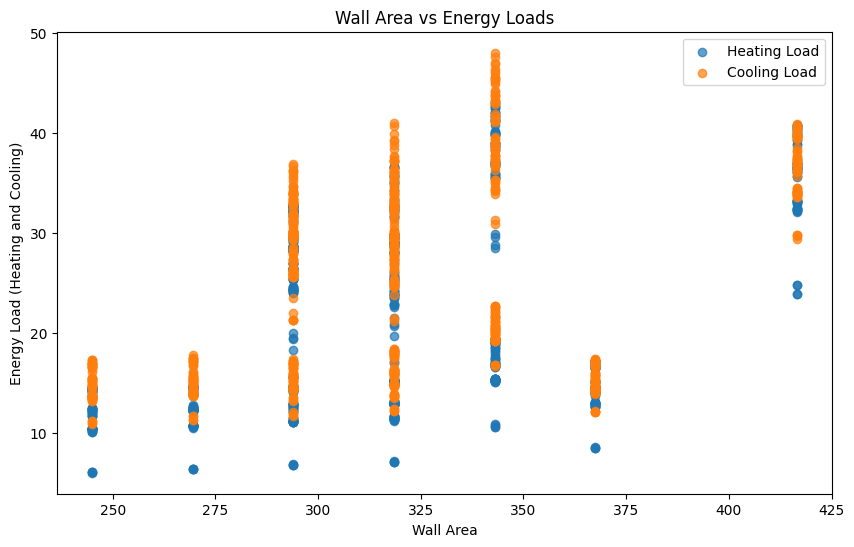

In [ ]:
# Visualize Relationships
plt.figure(figsize=(10, 6))
plt.scatter(data['Wall_Area'], data['Heating_Load'], alpha=0.7, label="Heating Load")
plt.scatter(data['Wall_Area'], data['Cooling_Load'], alpha=0.7, label="Cooling Load")
plt.title("Wall Area vs Energy Loads")
plt.xlabel("Wall Area")
plt.ylabel("Energy Load (Heating and Cooling)")
plt.legend()
plt.show()

**About the Scatter Plot Above**

This scatter plot visualizes relationships between Wall_Area and Heating_Load or Cooling_Load:

Points distributed diagonally (increasing or decreasing) indicate a clear relationship.

Randomly scattered points suggest little to no relationship.
For example: A trend showing higher wall area results in higher heating load suggests wall area significantly affects heating energy demand.

**Analysis of the Scatter Plot: Wall Area vs Energy Loads**

The scatter plot visualizes the relationship between Wall_Area and Heating_Load/Cooling_Load:

*  Heating_Load and Cooling_Load increase with larger Wall_Area, but the relationship is not perfectly linear.
*  This suggests that while wall area contributes to energy demand, other factors (e.g., insulation, glazing) also play significant roles.

## **Analysis 2 ~ Energy Efficiency Ratio**

I am also interested to calculate the Energy Efficiency Ratio (EER) which is commonly used in energy and building science to evaluate how efficiently a building uses energy relative to its size (surface area). This feature:

*  **Normalizes Energy Use**: Accounts for differences in building size.

*  **Identifies Inefficiencies**: Highlights buildings that consume more energy than expected per unit area.

*  **Widely Applicable**: Similar metrics are often used in research and industry to compare building energy performance.


I first need to calculate the Energy Efficiency Ratio (EER).

The formula is:

**Efficiency Ratio: (Heating Load + Cooling Load)/ Surface Area**

This ratio will tell how much energy is used per unit of surface area.


In [ ]:
# Create the Energy Efficiency Ratio
data['Energy_Efficiency_Ratio'] = (data['Heating_Load'] + data['Cooling_Load']) / data['Surface_Area']

# Summarize the new feature
print(data['Energy_Efficiency_Ratio'].describe())


count    768.000000
mean       0.073660
std        0.036473
min        0.024708
25%        0.038776
50%        0.058049
75%        0.109987
max        0.141209
Name: Energy_Efficiency_Ratio, dtype: float64


**Summary of the Energy Efficiency Ratio (EER):**

*   **Count**: 768 buildings in the dataset.
*   **Mean**: The average EER is 0.0737, this means that most buildings use about 0.0737 units of energy (heating + cooling) per unit of surface area.
*   **Standard Deviation**: The EER varies by 0.0365, showing moderate variability across buildings.
*   **Minimum**: The most efficient building has an EER of 0.0247.
*   **Maximum**: The least efficient building has an EER of 0.1412.
*   **Median (50% quantile)**: 0.0580, indicating that half the buildings have an EER below this value.

Key Insights from the above are:

*  Buildings with an EER closer to the **mean (0.0737)** are typical.
*  Higher EERs (**>0.11**) might indicate inefficient buildings that consume a lot of energy relative to their surface area.
*  Lower EERs (<**0.04**) might represent highly energy-efficient buildings.

## **Visualization ~ Histogram**

I'd like to understand how EER values are spread. For example, are most buildigns efficient or inefficient. I create a histogram chart for this purpose to show the distribution of EER values to identify common ranges.

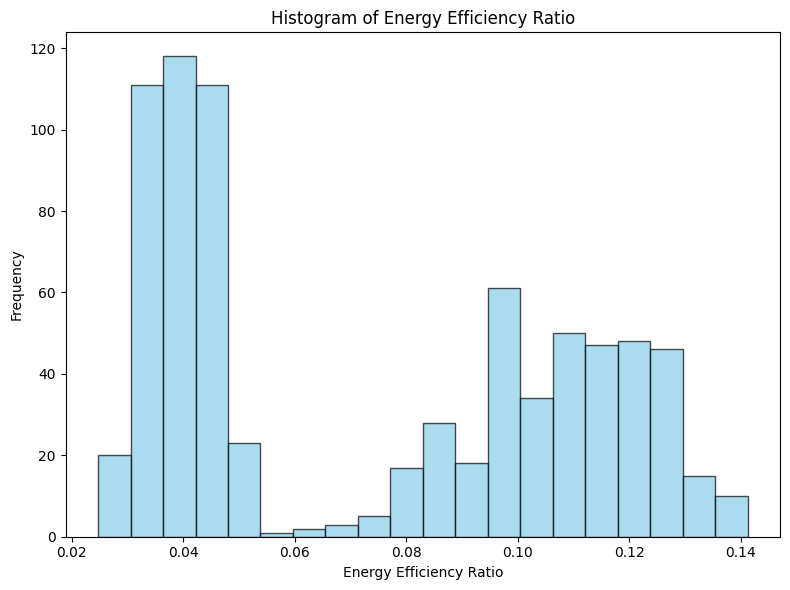

In [ ]:
# Histogram of Energy Efficiency Ratio
plt.figure(figsize=(8, 6))
plt.hist(data['Energy_Efficiency_Ratio'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Energy Efficiency Ratio')
plt.xlabel('Energy Efficiency Ratio')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()



How to Read the Histogram
*   The x-axis (Energy Efficiency Ratio):
Divides the EER into ranges (bins), such as 0.02–0.04, 0.04–0.06, etc.
*  The y-axis (Frequency):
Shows how many buildings have EER values in each range.

**Example:**
The tallest bar might be for the range 0.04–0.06, with a height of 300.
This means 300 buildings in the dataset have EER values between 0.04 and 0.06.

The frequency on the y-axis simply shows how many buildings fall into each bin (range) of the Energy Efficiency Ratio (EER) on the x-axis.

For example:

If the bar above the range 0.02–0.04 has a height of 200, it means 200 buildings in the dataset have an EER value between 0.02 and 0.04.

**Insights from the Histogram:**

Most buildings have an EER in the range of 0.02 to 0.10.
A smaller number of buildings have higher EER values, indicating lower efficiency.

The histogram shows how the values of the Energy Efficiency Ratio (EER) are distributed across the dataset. Here's what it tells us:

*   **1. Most Common EER Range:**
The majority of buildings have an EER between 0.02 and 0.10.
This suggests that most buildings in the dataset are relatively energy-efficient, as their energy use per unit of surface area is low.
*   **2. Outliers at the Higher End:**
A small number of buildings have an EER closer to 0.12–0.14 (the right tail of the histogram).
These are the least efficient buildings in the dataset, as they consume much more energy per unit of surface area. This could indicate poor insulation, excessive glazing, or other design inefficiencies.
*   **3. Skewness in Distribution**
The histogram is positively skewed (long tail to the right).
Most buildings cluster around lower EER values (higher efficiency), but a few outliers push the range higher.


**Key Takeaway for This Histogram**

The histogram shows that most buildings have EER values between 0.02 and 0.08 because the bars in this range are the tallest.

Fewer buildings have EER values beyond 0.12, which is why the bars on the right are much shorter.

***

*Note: In real-world energy analysis, lower EER values typically correspond to better energy efficiency:*

*   Higher EER: Indicates higher energy consumption per unit area.
*   Lower EER: Indicates more efficient use of energy resources.



## Visualization ~ Heatmap





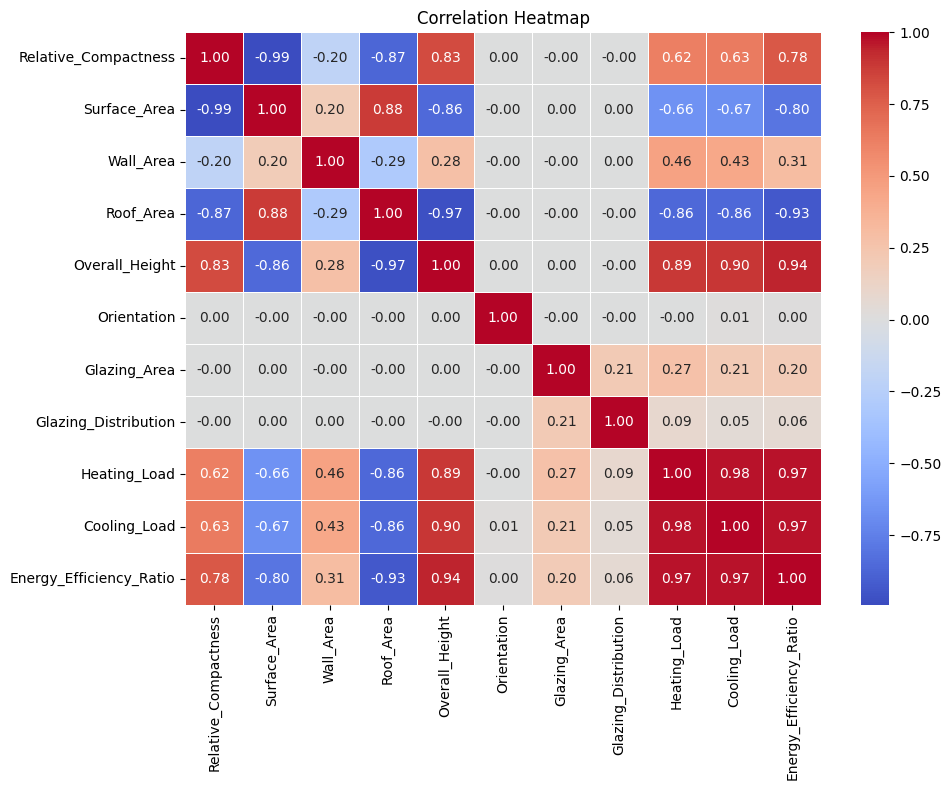

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()

plt.show()




*Color Code:*

*1. Dark Red = positive correlation*

*2. Dark Blue = negative correlation*

*3. White/Light Blue = weak / no correlatoin*

**Key Observations:**

*  Energy Efficiency Ratio (EER):
 *  Strongly correlates with Heating_Load and Cooling_Load (as expected, since it's derived from them).
 *  Weak correlation with features like Orientation and Glazing_Distribution.

*  Other Strong Correlations:
 *  Overall_Height is strongly correlated with Heating_Load and Cooling_Load (~0.89), suggesting taller buildings consume more energy.
 *  Roof_Area has a strong negative correlation with energy loads (~-0.86), indicating that larger roof areas may improve efficiency.

*  Weak Correlations:
 *  Features like Orientation and Glazing_Distribution show almost no correlation with energy loads or the EER.

## **Summary**

I started this analysis with 3 questions and my analysis helped answer those questions.

1. Which building features have the biggest impact on heating and cooling energy demand?

 *  Correlation heatmap: Shows the relationship of features like Wall_Area (+0.45), Roof_Area (-0.86), and Overall_Height (+0.89) with heating and cooling loads.
 *  Scatter plot: Wall_Area vs. Heating_Load and Cooling_Load demonstrates how wall size contributes to energy demands.

2. How does building compactness (Relative_Compactness) affect energy efficiency?

 *  Correlation matrix: Relative_Compactness has a strong positive correlation with Heating_Load (+0.62) and Cooling_Load (+0.63), showing that compactness significantly impacts energy consumption.
 *  Scatter plots can be added to directly visualize this relationship.

3. How can the Energy Efficiency Ratio (EER) help compare and rank buildings?

 *  EER calculation: The histogram of EER shows the distribution of energy efficiency across buildings.
 *  Summary statistics: Provides insights into the most and least efficient buildings based on their EER values.
